### Exploration

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Data Loading..

In [23]:
df_data_full=pd.read_csv('../../data.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [24]:
df_data_full.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
df_data=df_data_full.drop(columns=['Name','Photo','Club Logo','Flag'])

In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

#### Age Distribution

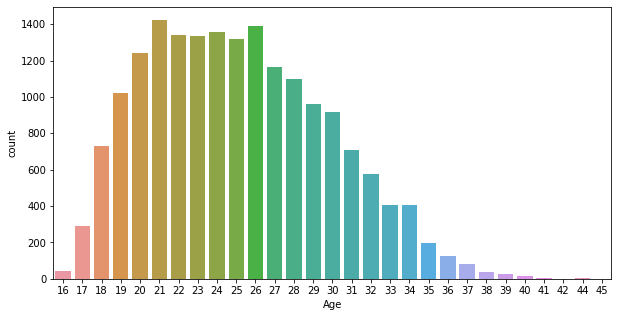

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_data,x='Age')

In [28]:
#df_data['CM'].apply(lambda x: x[:2],axis)
df_data.loc[0,'CM'][:2]

'84'

### Value & Wage distribution by Position

In [39]:
df_data['Release Clause'].value_counts(dropna=False)

NaN       1564
€1.1M      557
€1.3M      423
€1.4M      386
€1.2M      385
          ... 
€58.4M       1
€38.4M       1
€705K        1
€22.6M       1
€60.9M       1
Name: Release Clause, Length: 1245, dtype: int64

In [53]:
def convert_wage_and_value_to_number(x):
    if x[-1:]=='K':
        return float(x[1:-1])*1000
    elif x[-1:]=='M':
        return float(x[1:-1])*1000000
    else:
        return float(x[1:])

In [56]:
df_data['full_Value']=df_data['Value'].apply(lambda x: convert_wage_and_value_to_number(x)).astype(int)
df_data['full_Wage']=df_data['Wage'].apply(lambda x: convert_wage_and_value_to_number(x)).astype(int)
df_data['Full_ReleaseClause']=df_data['Release Clause'].fillna('€0').apply(lambda x: convert_wage_and_value_to_number(x)).astype(float)

In [10]:
df_data['full_Value'].value_counts()[df_data['full_Value'].value_counts()>1].keys().max()

77000000

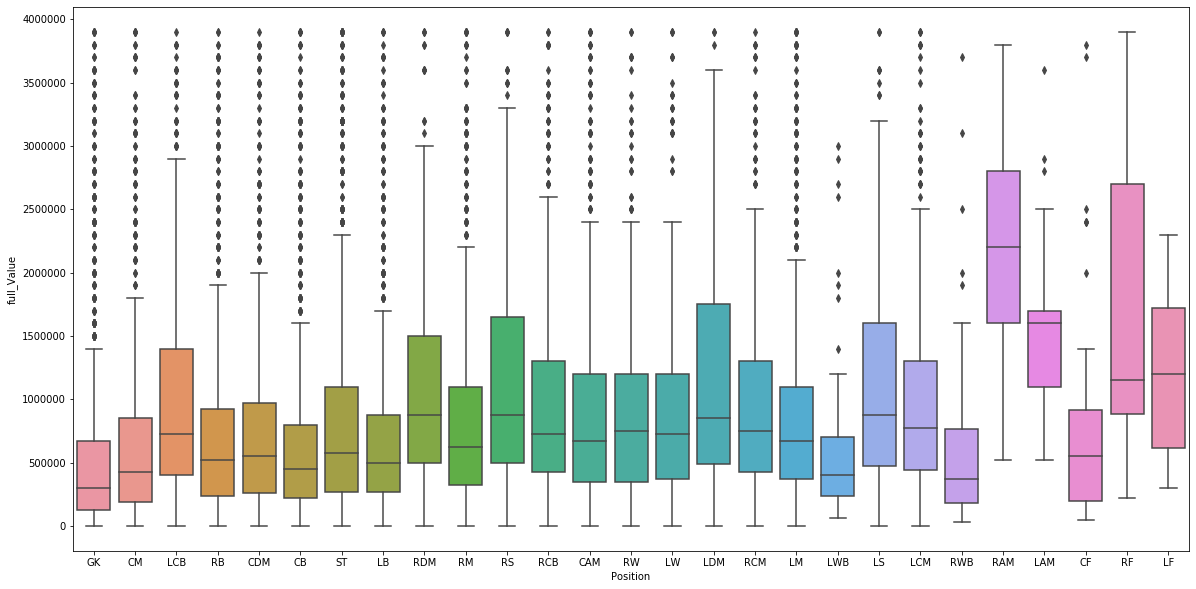

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_data[df_data['full_Value']<4000000],x='Position',y='full_Value')

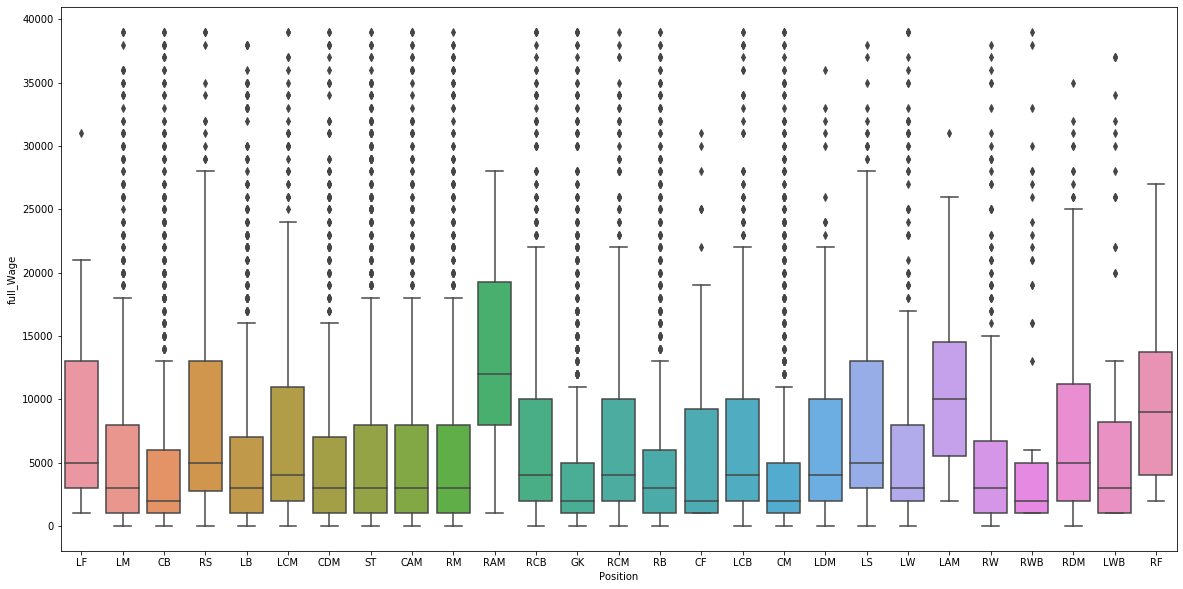

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_data[df_data['full_Wage']<40000],x='Position',y='full_Wage')

In [13]:
df_data['Nationality'].value_counts()[df_data['Nationality'].value_counts()>200].keys()

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands', 'Sweden', 'China PR', 'Chile',
       'Republic of Ireland', 'Mexico', 'United States', 'Poland', 'Norway',
       'Saudi Arabia', 'Denmark', 'Korea Republic', 'Portugal', 'Turkey',
       'Austria', 'Scotland', 'Belgium', 'Australia', 'Switzerland'],
      dtype='object')

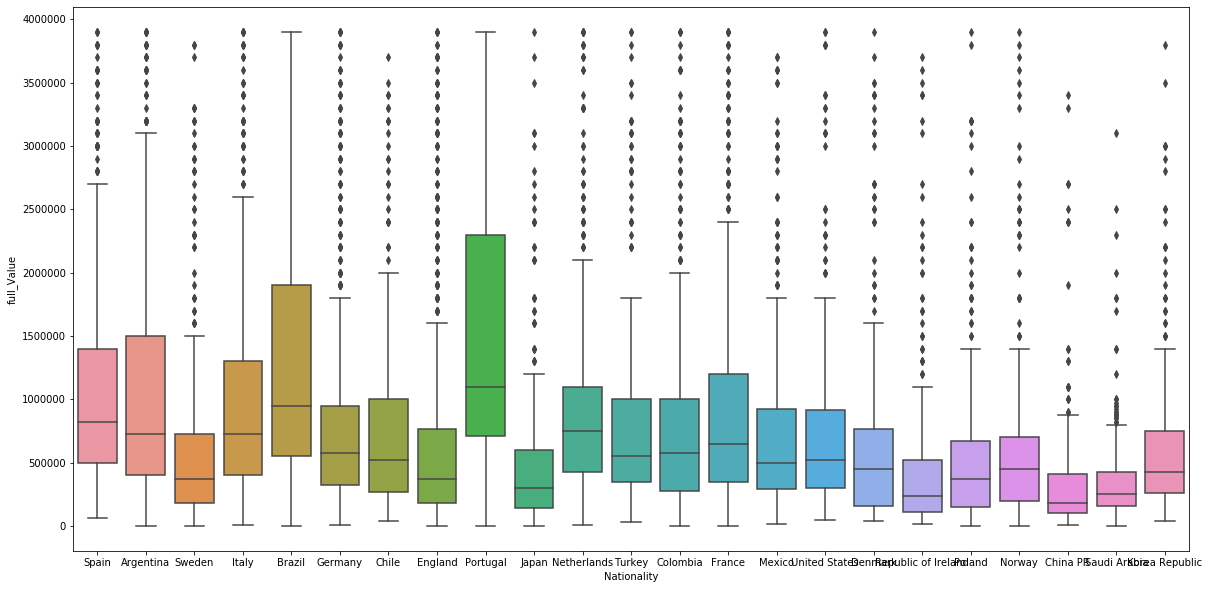

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_data[(df_data['full_Value']<4000000) & (df_data['Nationality'].isin(df_data['Nationality'].value_counts()[df_data['Nationality'].value_counts()>300].keys()))]
            ,x='Nationality',y='full_Value')

In [15]:
df_data['Jersey Number'].value_counts(dropna=False)

8.0     612
7.0     604
10.0    593
11.0    590
6.0     586
       ... 
65.0      4
64.0      2
74.0      2
79.0      2
85.0      1
Name: Jersey Number, Length: 100, dtype: int64

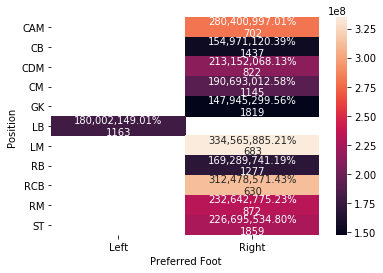

In [68]:
heatmap(df=df_data,f1='Position',f2='Preferred Foot',measure='full_Value', threshhold=500)

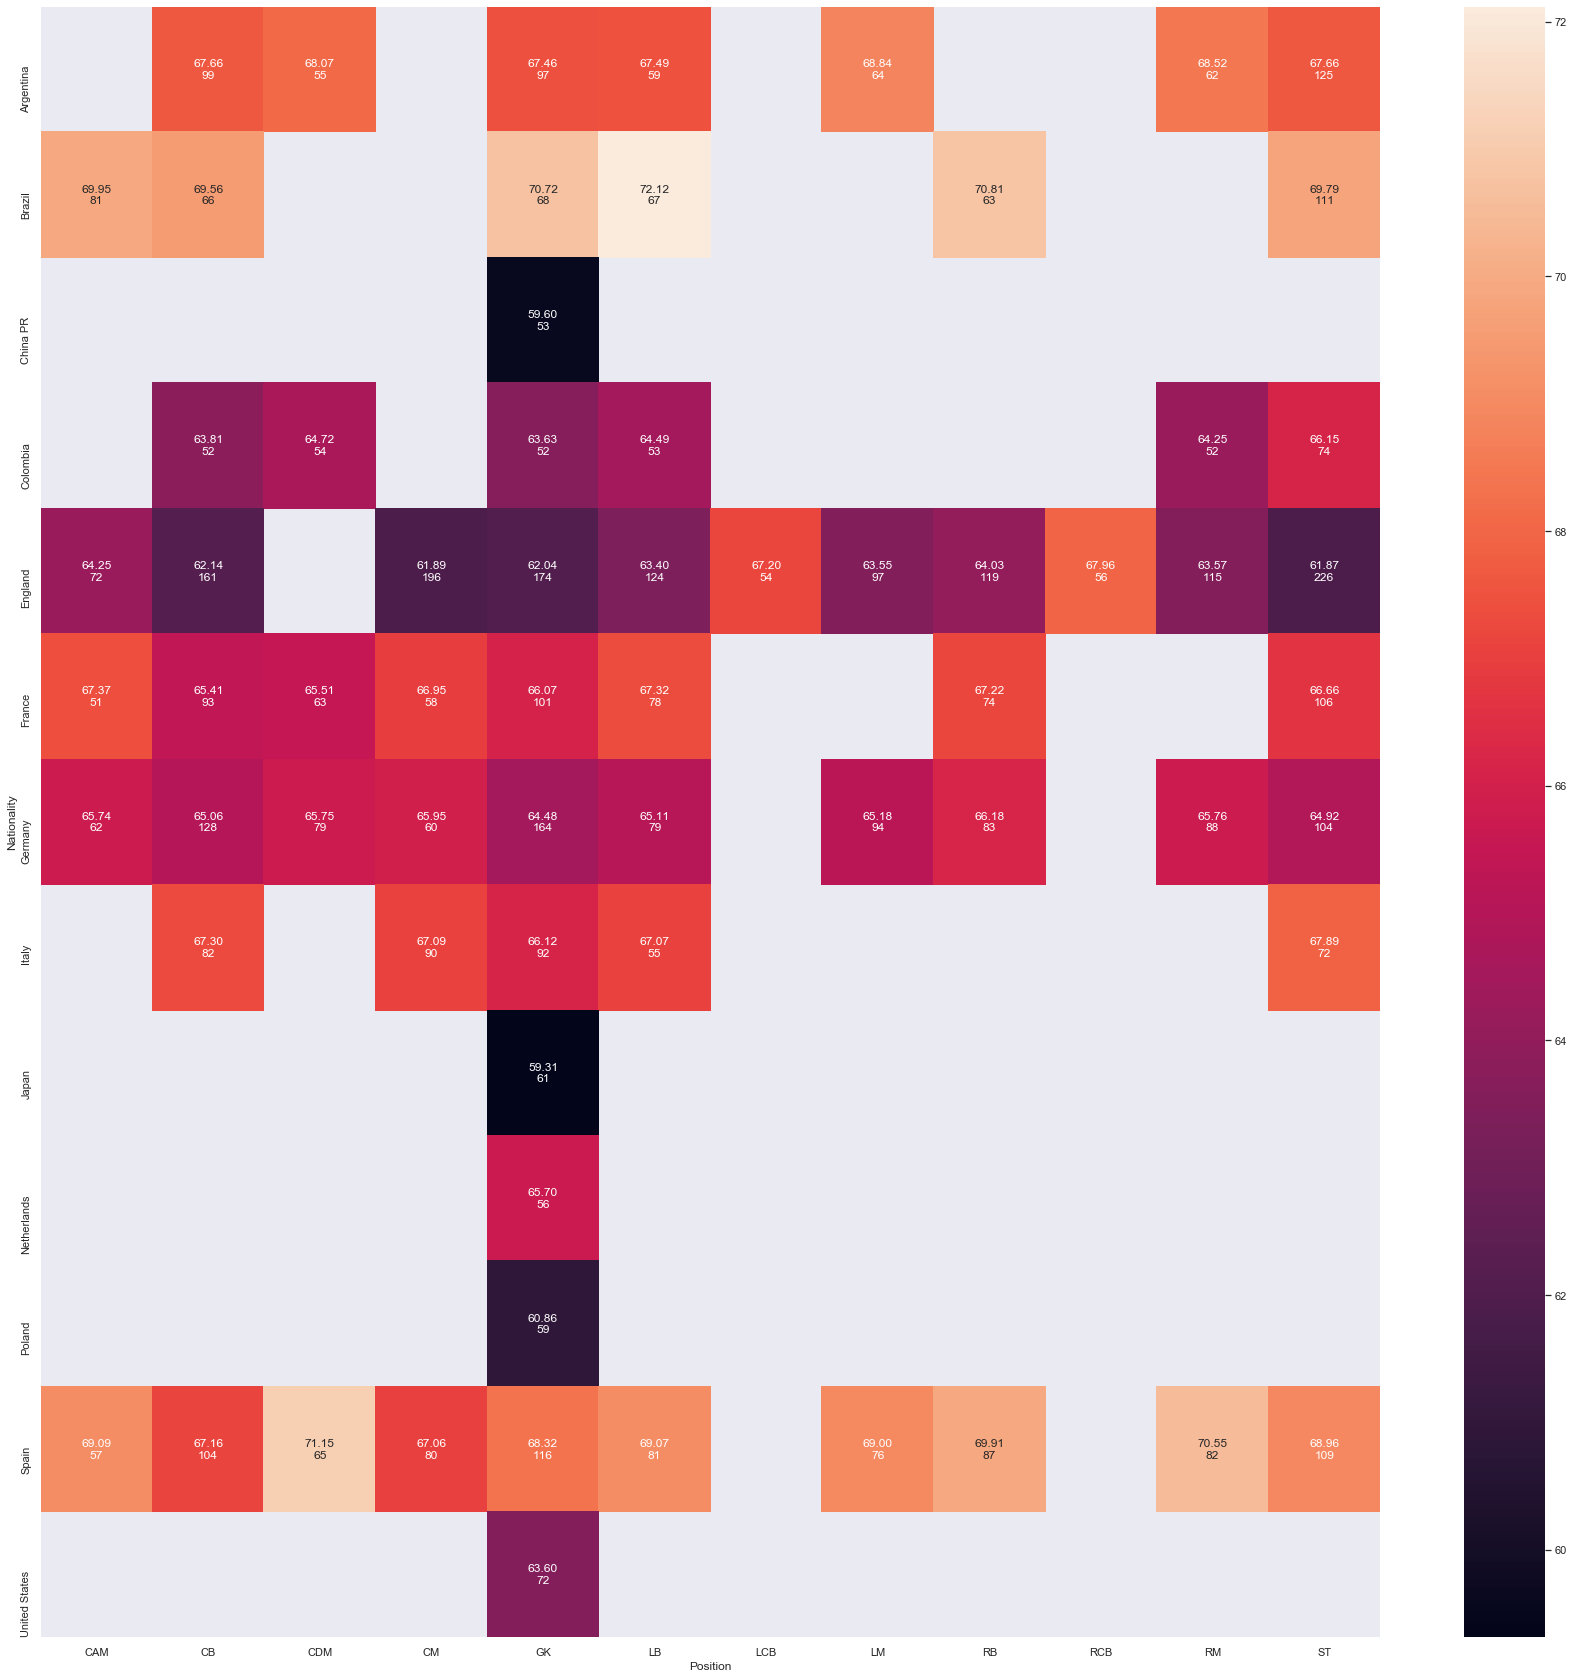

In [90]:
heatmap(df=df_data,f1='Nationality',f2='Position',measure='Overall', threshhold=50,figsize=(30,30))